## Question 1)

For the given “heart” dataset, identify the possibility of heart disease for a lady patient of 43 yrs old showing Asymptomatic chest pain with Serum cholesterol 252 mg/dl, Resting blood pressure in mm Hg as 100, Fixed defect Thalium stress and  Having ST-T wave abnormality; using 

i)	KNN algorithm :

In [8]:
import pandas as pd
import numpy as np

In [10]:
data = pd.read_csv("D:/Downloads/ML_LAB/ML_Lab_8/heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
status      0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  status    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
import math

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    distance = 0
    for a, b in zip(point1, point2):
        distance += (a - b) ** 2
    return math.sqrt(distance)

# KNN prediction function
def knn_predict(dataset, test_point, k=3):
    distances = []
    for index, row in dataset.iterrows():
        features = row[:-1]  # all columns except label
        label = row[-1]      # last column is the label
        dist = euclidean_distance(features, test_point)
        distances.append((dist, label))
    
    distances.sort()
    neighbors = distances[:k]

    # Majority vote
    labels = [label for _, label in neighbors]
    prediction = max(set(labels), key=labels.count)
    return prediction

In [22]:
# Features + target for KNN
data = data[["age", "sex", "cp", "chol", "trestbps", "thal", "restecg", "status"]]

# Test input (patient info)
test_point = [43, 0, 3, 252, 100, 2, 1]  # no label

# Predict using KNN
result = knn_predict(data, test_point, k=3)
print("KNN Prediction (Heart Disease):", "Yes" if result == 1 else "No")

KNN Prediction (Heart Disease): Yes


C:\Users\hp\AppData\Local\Temp\ipykernel_23024\2100806741.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[-1]      # last column is the label


## Inference :

The K-Nearest Neighbors (KNN) algorithm classifies customers based on similarity to nearby data points, effectively grouping individuals with similar traits for accurate and intuitive segmentation.

ii)	Naive Bayes classifier algorithm.

In [31]:
from sklearn.naive_bayes import GaussianNB

# Split features and labels
X = data.iloc[:, :-1]  # all columns except the last (features)
y = data.iloc[:, -1]   # last column (labels)

# Create and train the model
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [33]:

test_point = np.array([43, 0, 3, 252, 100, 2, 1]) .reshape(1, -1)
prediction = model.predict(test_point)

# Print prediction
print("Naive Bayes Prediction (Heart Disease):", "Yes" if prediction[0] == 1 else "No")

Naive Bayes Prediction (Heart Disease): Yes


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## Inference :

The Naive Bayes classifier predicts customer segments based on feature probabilities, showing strong performance when features are independent, and effectively classifies customers into distinct categories for targeted decision-making.

## Question 2)

For the given “customer segmentation” dataset, create the cluster using K-Means algorithm. Choose the features appropriately.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/ML_Lab_8/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [34]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
X = data[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [37]:
X["Gender"] = X["Gender"].replace({"Male": 1, "Female": 0})
X.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_420\4121524701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Gender"] = X["Gender"].replace({"Male": 1, "Female": 0})
C:\Users\hp\AppData\Local\Temp\ipykernel_420\4121524701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].replace({"Male": 1, "Female": 0})


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

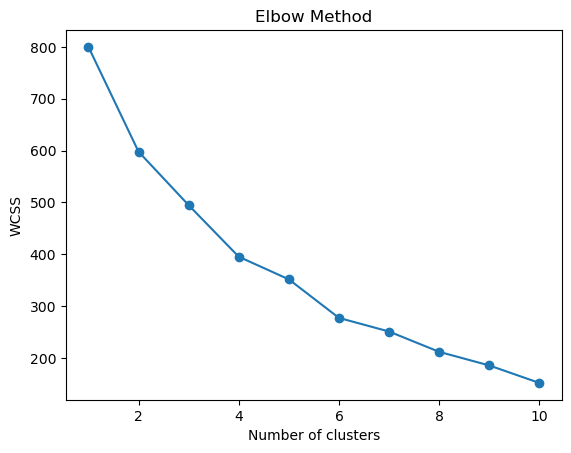

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Cluster'] = clusters

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


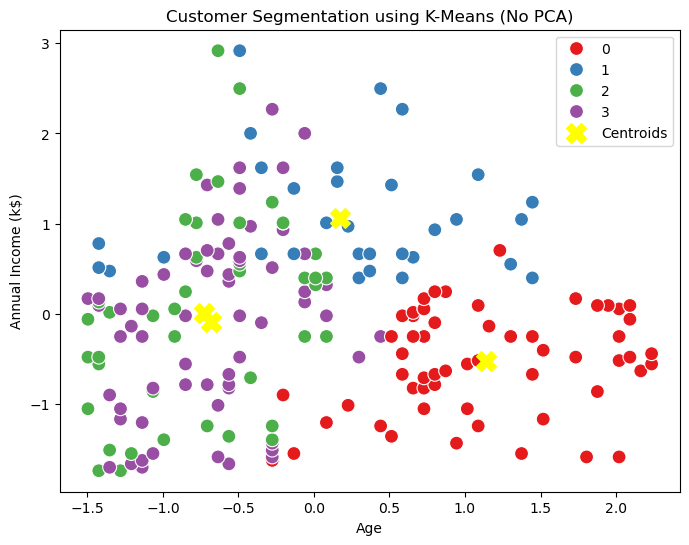

In [50]:
# Pick any 2 features to visualize
feature_x = 'Age'
feature_y = 'Annual Income (k$)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_scaled_df, x=feature_x, y=feature_y, hue='Cluster', palette='Set1', s=100)
# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, X.columns.get_loc(feature_x)],
    kmeans.cluster_centers_[:, X.columns.get_loc(feature_y)],
    s=200, c='yellow', label='Centroids', marker='X'
)
plt.title('Customer Segmentation using K-Means (No PCA)')
plt.legend()
plt.show()

## Inference :

The K-Means clustering on the Mall Customers dataset (using Age and Annual Income) reveals six distinct customer segments, ranging from high-income high-spending target customers to low-income low-spending groups, enabling more personalized marketing strategies.